In [2]:
%matplotlib notebook
plt.style.use('ggplot')
from numba import jit
from exercises import linear_regression

<IPython.core.display.Javascript object>


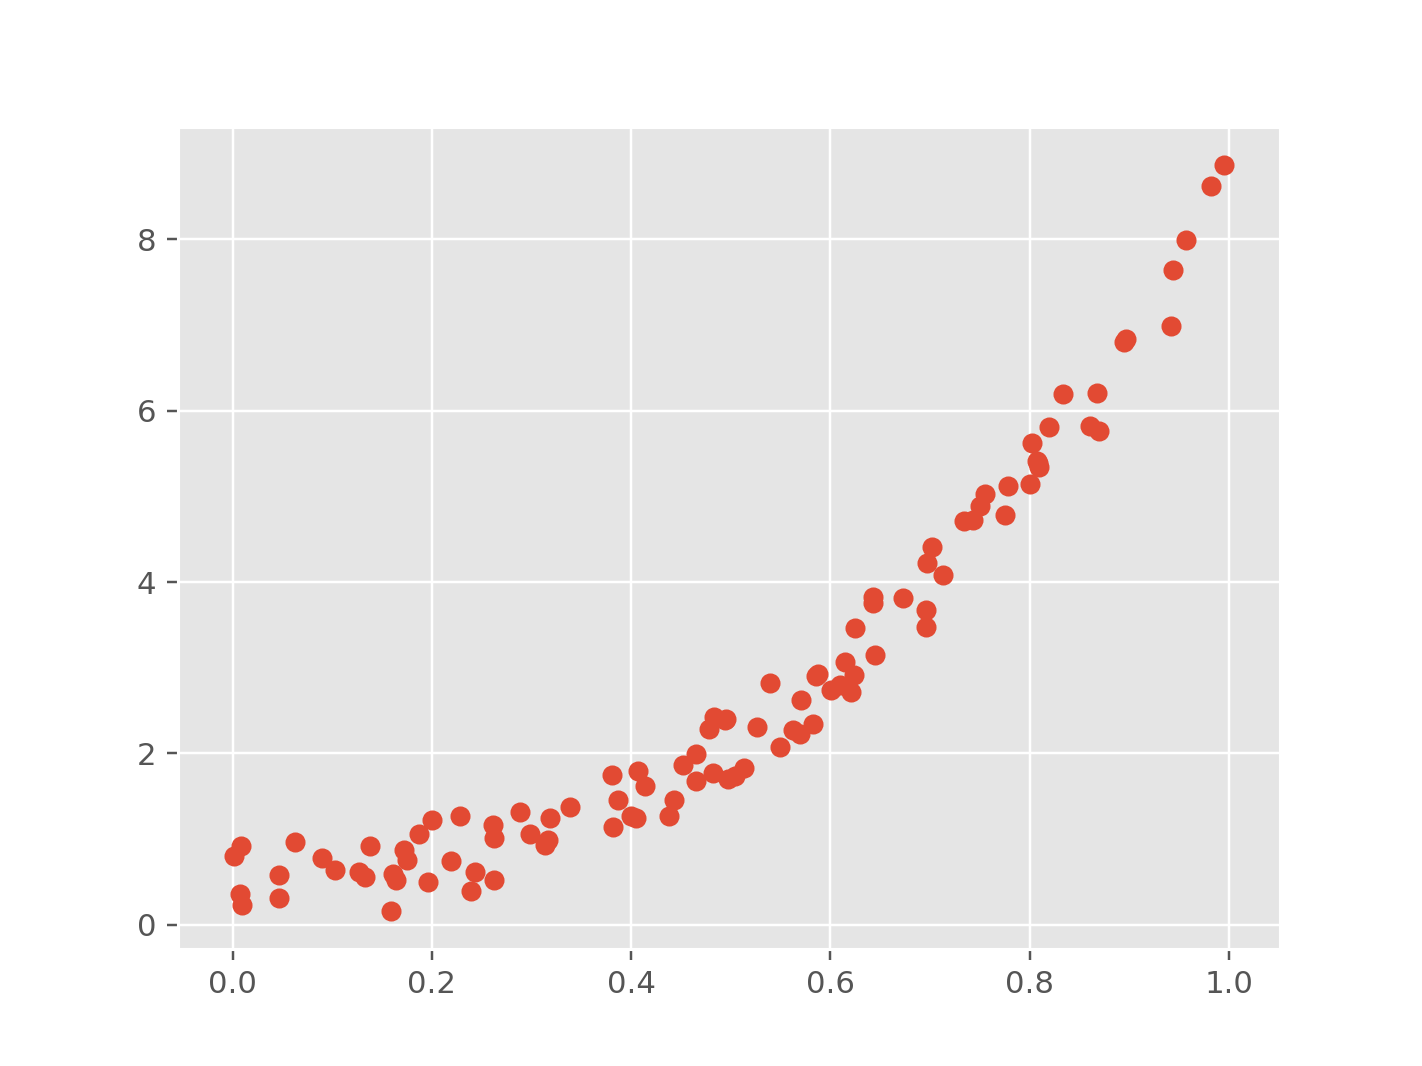

In [60]:
x = np.random.rand(100, 1)
x = np.sort(x, axis=0)
y = 5*x*x + 1*np.random.rand(100, 1) + 3*x**3
f, ax = plt.subplots(1)
ax.scatter(x, y)

### Manual code

In [61]:
β = linear_regression(x, y, order=2)

<IPython.core.display.Javascript object>


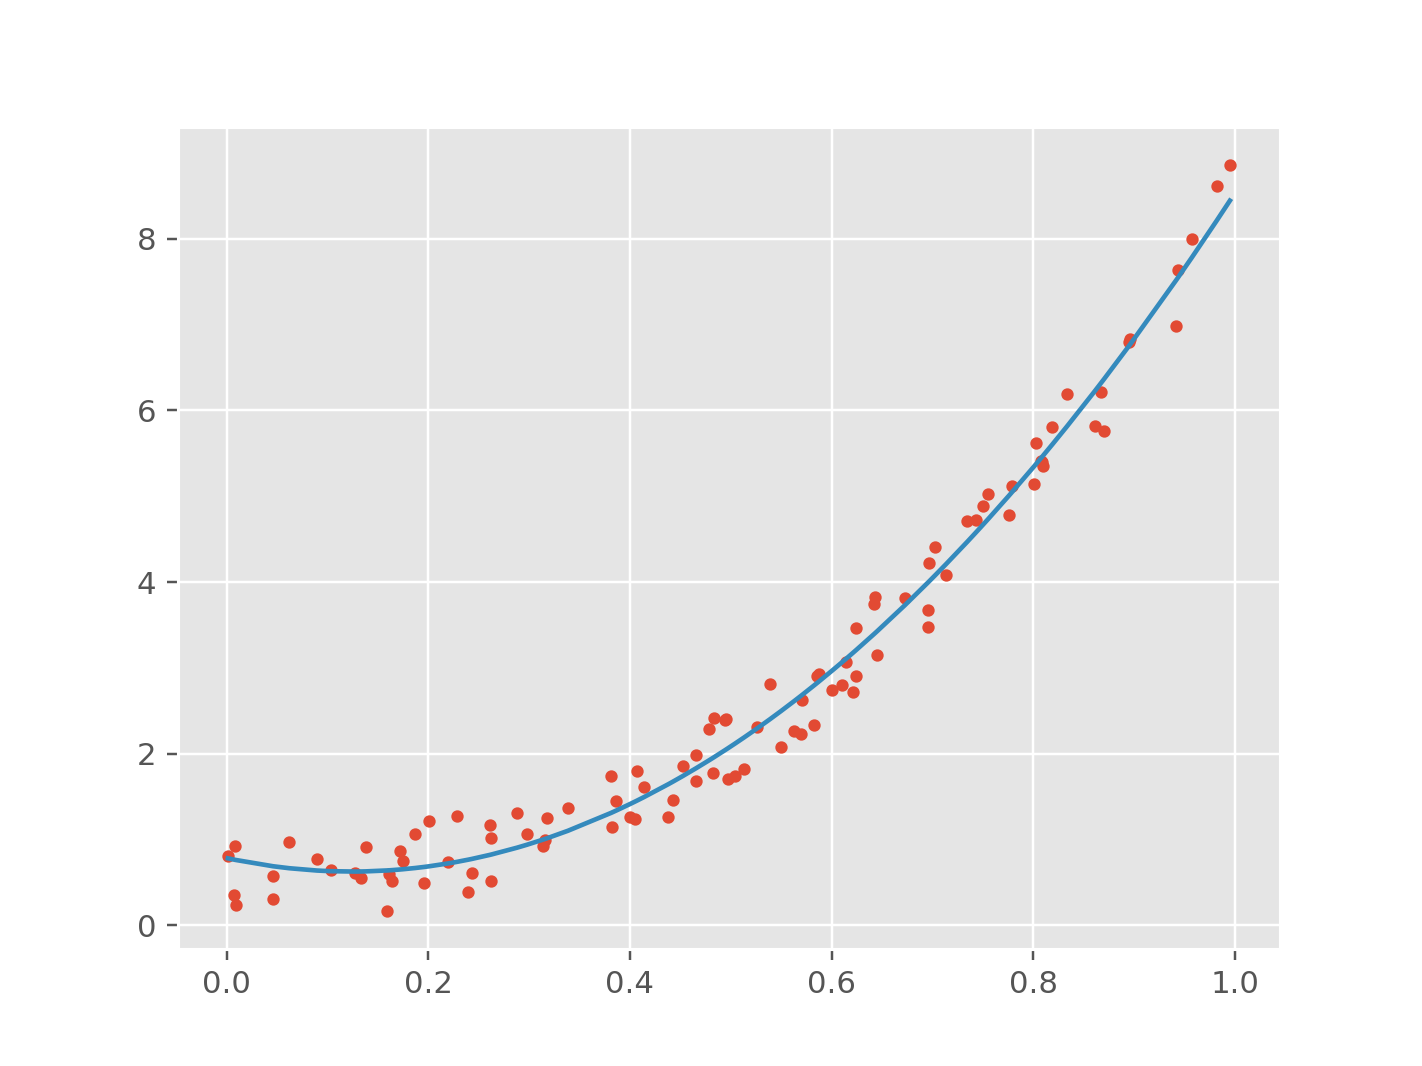

In [63]:
fig, ax = plt.subplots(1)
ax.plot(x, y, '.')
ỹ = np.sum(β[i]*x**i for i in range(len(β)))
ax.plot(x, ỹ)

In [5]:
def time(func, sizes=[5, 10, 50, 100, 200, 500, 1000, 1500, 2000]):
    times = []
    for size in sizes:
        x = np.random.rand(size, 1)
        y = 5*x*x * 0.1*np.random.rand(size, 1)
        time = %timeit -o func(x, y)
        times.append(time)
    return sizes, [t.average for t in times], [t.stdev for t in times]

In [6]:
s_plain, a_plain, std_plain = time(linear_regression)

20.5 µs ± 2.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
20.2 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
21.2 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
22.2 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
22.3 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
31.5 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.2 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
41.6 µs ± 851 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
45.8 µs ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<IPython.core.display.Javascript object>


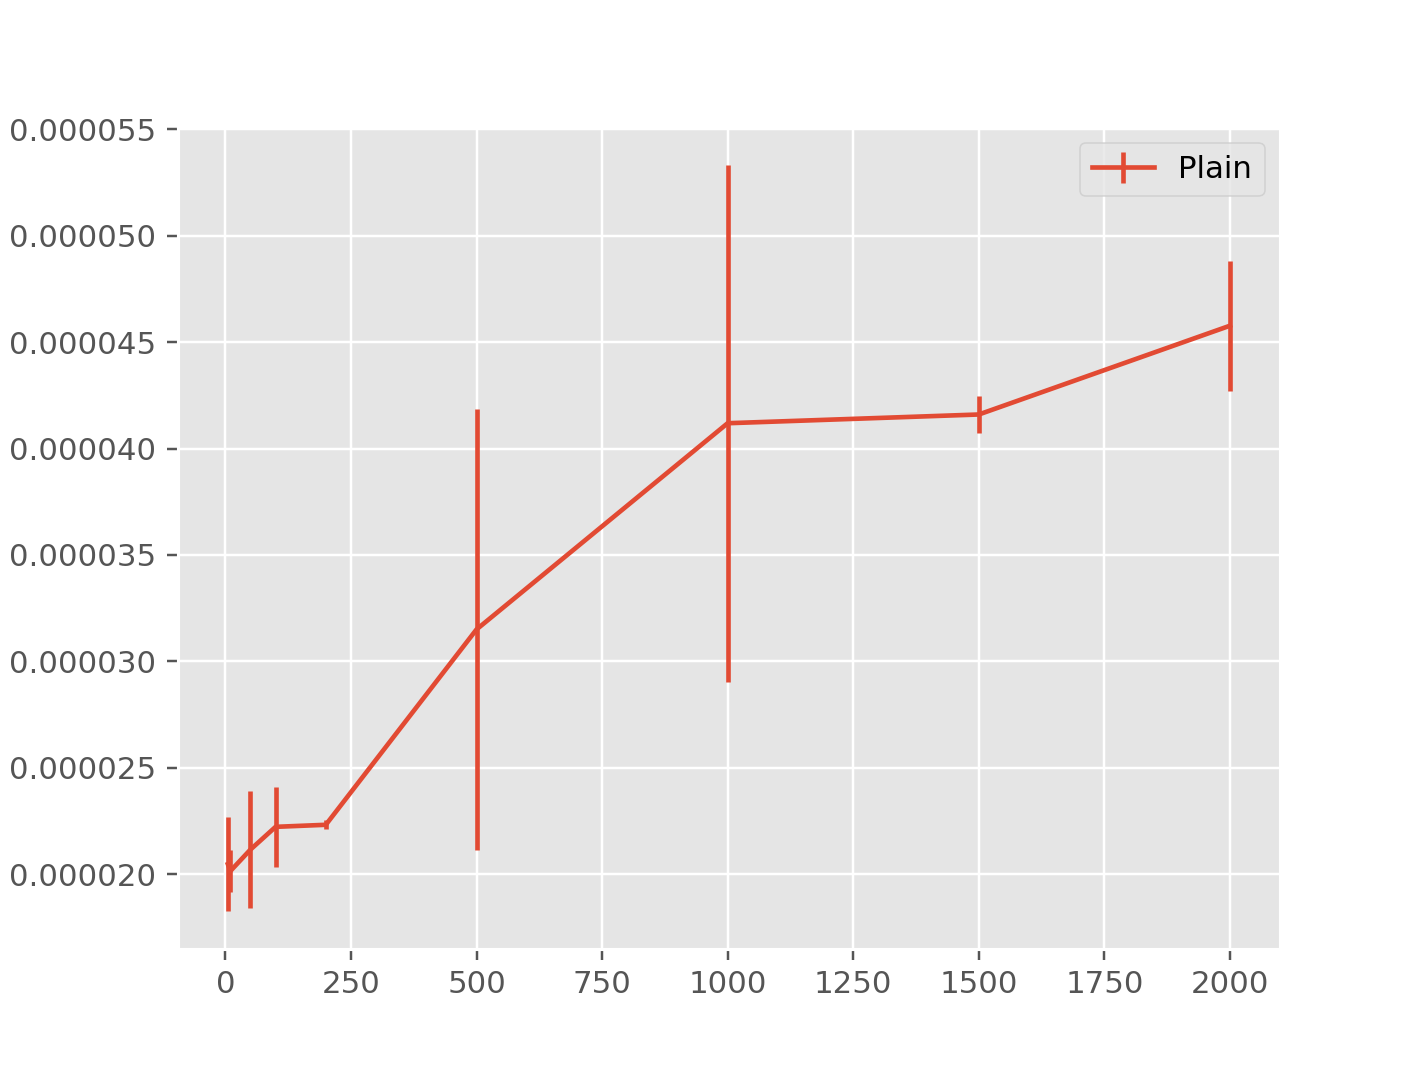

In [13]:
fig, ax = plt.subplots(1)
ax.errorbar(s_plain, a_plain, yerr=std_plain, label='Plain')
ax.legend()

### Using Scikitlearn 

In [1]:
from sklearn import linear_model

In [27]:
def vandermonde(x, order=1):
    X = np.ones((len(x), order))
    for n in range(order):
        X[:, n] = (x**(n+1)).flatten()
    return X

#### Linear polynomial regression

In [67]:
X = vandermonde(x, order=2)
reg = linear_model.LinearRegression()
clf = reg.fit(X, y)
ỹ = clf.predict(X)

#### Ridge regression 

In [68]:
α = [0.1, 0.2, 0.5, 0.7, 0.9]
ỹ_ridge = []
for alpha in α:
    reg = linear_model.Ridge(alpha=alpha)
    clf = reg.fit(X, y)
    ỹ_ridge.append(clf.predict(X))

#### Lasso regression

In [69]:
reg = linear_model.LassoLarsCV()
clf = reg.fit(X, y)

<IPython.core.display.Javascript object>


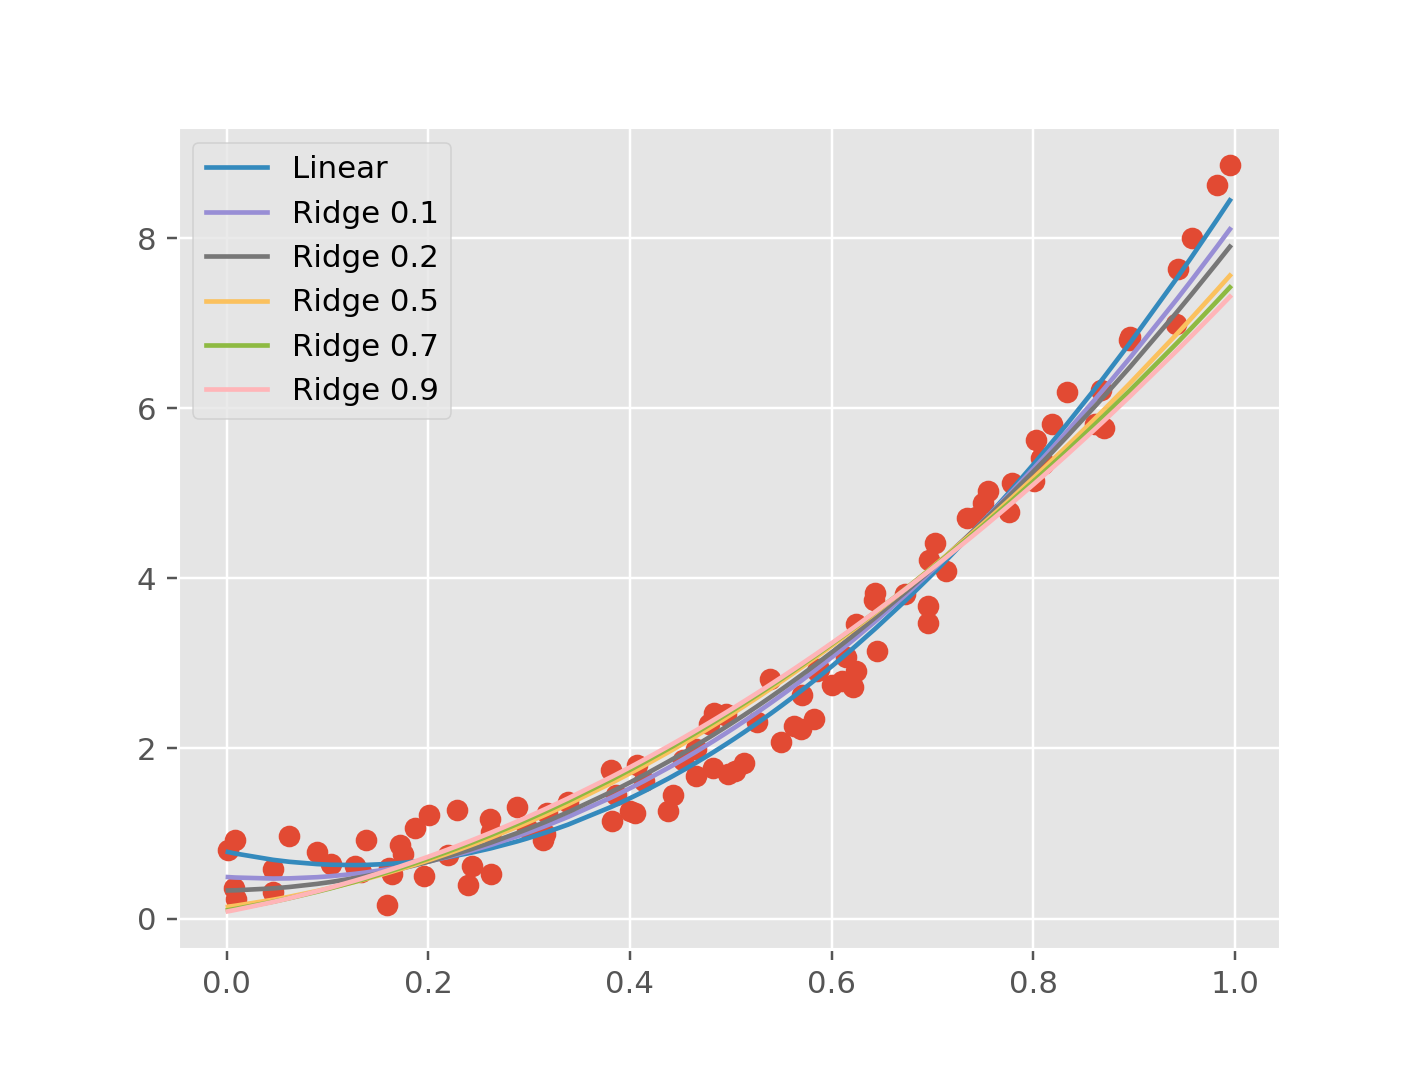

In [66]:
f, ax = plt.subplots(1)
ax.plot(x, y, 'o')
ax.plot(x, ỹ, label="Linear")
for alpha, y in zip(α, ỹ_ridge):
    ax.plot(x, y, label=f"Ridge {alpha}")
for 
ax.legend()

In [80]:
from sklearn.metrics import (explained_variance_score, max_error, 
                             mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error, r2_score)
scorers = (explained_variance_score, max_error, 
                             mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error, r2_score)

In [79]:
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [91]:
for yc in [ỹ, *ỹ_ridge]:  
    for score in scorers:
        name = retrieve_name(score)
        print(f"{name[0]:30} {score(y, yc):.2e}")
    print()

explained_variance_score       1.00e+00
max_error                      8.88e-16
mean_absolute_error            4.50e-16
mean_squared_error             3.36e-31
mean_squared_log_error         7.02e-32
median_absolute_error          4.44e-16
r2_score                       1.00e+00

explained_variance_score       1.00e+00
max_error                      9.91e-02
mean_absolute_error            2.58e-02
mean_squared_error             1.02e-03
mean_squared_log_error         1.56e-04
median_absolute_error          2.46e-02
r2_score                       1.00e+00

explained_variance_score       9.99e-01
max_error                      1.68e-01
mean_absolute_error            4.22e-02
mean_squared_error             2.76e-03
mean_squared_log_error         3.40e-04
median_absolute_error          4.07e-02
r2_score                       9.99e-01

explained_variance_score       9.98e-01
max_error                      3.10e-01
mean_absolute_error            7.52e-02
mean_squared_error             9.04e-